In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [11]:
iris = load_iris(as_frame = True, )

In [19]:
irisData = pd.DataFrame(iris.data)
irisData['Class'] = iris.target
irisData['Class'] = irisData.Class.replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
irisData = irisData.rename(columns = {'sepal length (cm)' : 'SepalLength', 'sepal width (cm)' : 'SepalWidth', 
                                        'petal length (cm)' : 'PetalLength', 'petal width (cm)' : 'PetalWidth'})

In [20]:
irisData.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
irisData.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

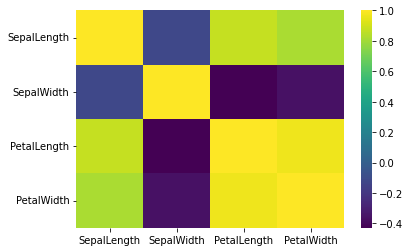

In [30]:
sns.heatmap(irisData.corr(), cmap = 'viridis')

In [32]:
features = irisData.iloc[:, :-1]
target = irisData.iloc[:, -1:]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .2)

In [34]:
clf = DecisionTreeClassifier()
modelo = clf.fit(X_train, y_train)
previsoes = modelo.predict(X_test)

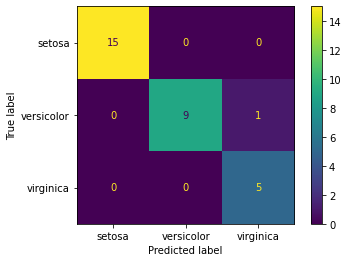

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, previsoes, labels = modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot()
plt.show()

In [36]:
accuracy_score(y_test, previsoes)

0.9666666666666667

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

In [47]:
digitos_data = load_digits()

In [48]:
digitos = pd.DataFrame(digitos_data.data)
#digitos['target'] = digitos_data.target
digitos

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [49]:
data = scale(digitos)
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [50]:
data.shape

(1797, 64)

In [51]:
n_observ, n_features = data.shape

In [52]:
n_digits = len(np.unique(digitos_data.target))
labels = digitos_data.target

In [53]:
clf = RandomForestClassifier(n_estimators = 10)
modelo = clf.fit(data, labels)

In [54]:
scores = clf.score(data,labels)

In [56]:
print(scores)

1.0


In [57]:
importances = clf.feature_importances_
indices = np.argsort(importances)

In [58]:
ind = [ ]
for i in indices:
    ind.append(labels[i])

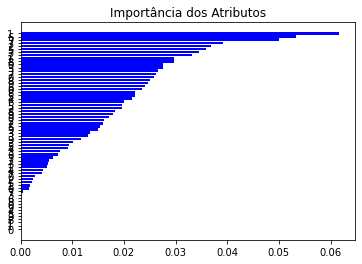

In [60]:
plt.figure(1)
plt.title('atrib importance')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), ind)
plt.show()

### new model

In [63]:
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_iris

In [64]:
iris = load_iris()

In [65]:
rf = RandomForestClassifier(max_depth = 4)

In [66]:
idx = list(range(len(iris.target)))

In [67]:
np.random.shuffle(idx)

In [68]:
rf.fit(iris.data[idx][:100], iris.target[idx][:100])

RandomForestClassifier(max_depth=4)

In [69]:
instance = iris.data[idx][100:101]
print(rf.predict_proba(instance))

[[0.         0.00361111 0.99638889]]


In [70]:
prediction, bias, contributions = ti.predict(rf, instance)
print ("prevs", prediction)
print ("atribs contrib")
for item, feature in zip(contributions[0], iris.feature_names):
    print (feature, item)

Previsões [[0.         0.00361111 0.99638889]]
Contribuição dos Atributos:
sepal length (cm) [-0.03845553 -0.05505923  0.09351476]
sepal width (cm) [-0.00355509 -0.00541811  0.00897321]
petal length (cm) [-0.12819717 -0.0996534   0.22785057]
petal width (cm) [-0.12339221 -0.19415814  0.31755035]
